IMPORT LIBRARIES

In [4]:
from data_visualizer import DataVisualizer
#!pip install ultralytics
#!pip install roboflow
from roboflow import Roboflow
from ultralytics import YOLO
import torch
import shutil
import sys
sys.path.append('../')
from api_key import dataset_key

LOAD ROBOFLOW DATASET

In [2]:
rf = Roboflow(api_key=dataset_key)
project = rf.workspace("computervision-jifim").project("hockey-playerdetection")
version = project.version(6)
dataset = version.download("yolov9")             

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to hockey-playerdetection-6 in yolov9:: 100%|██████████| 6459/6459 [00:07<00:00, 864.60it/s] 


INSPECT DATASET

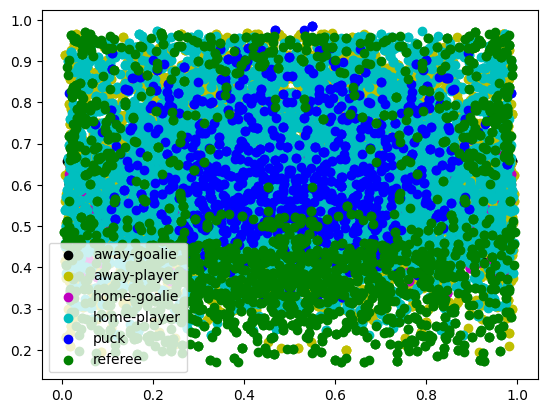

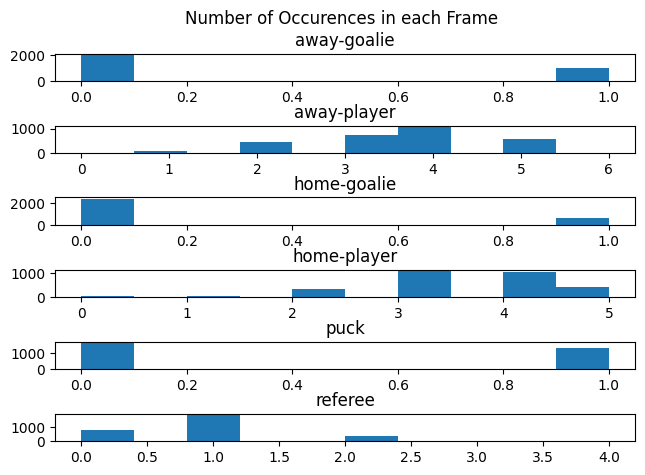

In [3]:
data = DataVisualizer(dataset.location)
data.plotBoxLocation()
data.plotBoxCounts()

TRAIN YOLO ON DATASET

In [4]:
#clear cache
torch.cuda.empty_cache()

In [ ]:
#set path to dataset
path = dataset.location+'/data.yaml'

In [ ]:
#calculate optimal hyperparameters
model = YOLO("yolov10l.pt")
epochs = 25
iterations = 100

calc_optimal_hyper_param = True
if (calc_optimal_hyper_param):
    model.tune(data=path, 
               epochs=epochs, 
               iterations=iterations, 
               optimizer="AdamW")

Tuner: Initialized Tuner instance with 'tune_dir=runs\detect\tune'
Tuner:  Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/5 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}


In [ ]:
#train model
epochs = 100
image_size = 640
hyperparameter_path = "./runs/detect/tune/best_hyperparameters.yaml"
print(hyperparameter_path)

if (calc_optimal_hyper_param):
    results = model.train(data=path, epochs=epochs, imgsz=image_size, cfg=hyperparameter_path)
else:
    results = model.train(data=path, epochs=epochs, imgsz=image_size)